In [1]:
import numpy as np 


In [2]:
!ls

English.txt
Hindi.txt
Names_indian.txt
bad-words.txt
bigram_numpy_yt.ipynb
bigram_pure_numpy_without_jax.ipynb
makemore.py
makemore_bigram.py
makemore_bigram_jax.py
makemore_bigram_part1.ipynb
makemore_part2_mlp.ipynb
makemore_part3_bn.ipynb
makemore_part4_backprop.ipynb
makemore_part5_cnn1.ipynb
names.txt
youtube-1.ipynb


In [3]:
words = open('Names_indian.txt', 'r').read().splitlines()
words2 = open('names.txt', 'r').read().splitlines()

In [4]:
words = words + words2

In [5]:
# temp = words
words = [w.lower() for w in words]
words[:3]

['aaban', 'aabharan', 'aabhas']

In [6]:
len(words)

87724

In [7]:
words[4200]

'balavadan'

In [8]:
min(len(w) for w in words)

2

In [9]:
max(len(w) for w in words)

25

In [10]:
# tokenizer 
chars = list(set(''.join(words)))
chars
stoi = {c:i for i,c in enumerate(chars)}

itos = {i:c for c,i in stoi.items()}

In [11]:
stoi

{'r': 0,
 'q': 1,
 '-': 2,
 'o': 3,
 'a': 4,
 '.': 5,
 's': 6,
 'v': 7,
 'b': 8,
 'j': 9,
 'i': 10,
 'z': 11,
 'c': 12,
 'p': 13,
 'd': 14,
 'w': 15,
 'x': 16,
 't': 17,
 ' ': 18,
 'n': 19,
 'g': 20,
 'u': 21,
 'k': 22,
 'y': 23,
 'h': 24,
 'l': 25,
 'e': 26,
 'f': 27,
 'm': 28}

In [12]:
itos

{0: 'r',
 1: 'q',
 2: '-',
 3: 'o',
 4: 'a',
 5: '.',
 6: 's',
 7: 'v',
 8: 'b',
 9: 'j',
 10: 'i',
 11: 'z',
 12: 'c',
 13: 'p',
 14: 'd',
 15: 'w',
 16: 'x',
 17: 't',
 18: ' ',
 19: 'n',
 20: 'g',
 21: 'u',
 22: 'k',
 23: 'y',
 24: 'h',
 25: 'l',
 26: 'e',
 27: 'f',
 28: 'm'}

In [13]:
string = "hello world"
string = "vivek"
ints = []
for c in string:
    ints.append(stoi[c])
print(ints)   

[7, 10, 7, 26, 22]


In [14]:
string = [24, 7, 24, 10, 16]
for i in string:
    
    print(itos[i])

h
v
h
i
x


In [15]:
# trigram
for w in words[:1]:
    chs = ['Start'] + list(w) + ['End']
    for ch1,ch2,ch3 in zip(chs,chs[1:],chs[2:]):
        print(ch1,ch2,ch3)
        
    
    
    

Start a a
a a b
a b a
b a n
a n End


In [16]:
# bigram
bigr = {} 
for w in words:
    chs = ['Start'] + list(w) + ['End']
    for ch1,ch2 in zip(chs,chs[1:]):
#         print(ch1,ch2)
        bigram = (ch1,ch2)
        bigr[bigram] = bigr.get(bigram,0) + 1
        
        

In [17]:
sorted(bigr.items(), key = lambda x: -x[1])

[(('a', 'n'), 31834),
 (('a', 'End'), 23357),
 (('h', 'a'), 20877),
 (('n', 'End'), 20541),
 (('t', 'h'), 16058),
 (('s', 'h'), 15949),
 (('a', 'r'), 14465),
 (('r', 'a'), 13327),
 (('i', 'End'), 11633),
 (('Start', 'a'), 11184),
 (('n', 'a'), 11183),
 (('y', 'a'), 9906),
 (('h', 'i'), 9089),
 (('n', 'i'), 8800),
 (('k', 'a'), 8551),
 (('m', 'a'), 8440),
 (('r', 'i'), 8232),
 (('i', 'n'), 7405),
 (('Start', 's'), 7375),
 (('l', 'a'), 7302),
 (('Start', 'k'), 7284),
 (('h', 'End'), 7073),
 (('v', 'a'), 6870),
 (('a', 's'), 6674),
 (('a', 'l'), 6557),
 (('Start', 'm'), 6497),
 (('a', 't'), 6030),
 (('i', 's'), 5767),
 (('e', 'n'), 5760),
 (('e', 'e'), 5681),
 (('a', 'm'), 5669),
 (('s', 'a'), 5579),
 (('i', 't'), 5520),
 (('v', 'i'), 5509),
 (('a', 'a'), 5166),
 (('Start', 'r'), 5082),
 (('e', 'End'), 5033),
 (('Start', 'j'), 4984),
 (('j', 'a'), 4936),
 (('a', 'y'), 4858),
 (('Start', 'd'), 4828),
 (('Start', 'n'), 4753),
 (('Start', 'v'), 4567),
 (('a', 'v'), 4550),
 (('e', 's'), 4436)

In [18]:
vocab_size = len(itos)
vocab_size

29

In [19]:
N = np.zeros((29,29), dtype = np.int32)
N.shape

(29, 29)

In [20]:
# create a probability distribution using the counts we got 
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
#         print(ch1,ch2)
#         print(ix1,ix2)
        N[ix1,ix2] += 1
    

In [21]:
N

array([[  544,    16,     0,  1502, 13327,  3142,  1581,   564,   110,
          194,  8232,    37,   170,    93,   390,    56,     3,  1301,
           10,   656,   178,  2911,   232,  1099,   185,   513,  3339,
           10,   709],
       [    1,     0,     0,     2,    16,    39,     2,     0,     2,
            0,    20,     0,     0,     0,     0,     3,     0,     0,
            0,     0,     0,   224,     0,     0,     0,     1,     1,
            0,     2],
       [    0,     0,     0,     0,     1,     0,     1,     1,     1,
            0,     1,     0,     0,     0,     3,     0,     0,     0,
            0,     1,     0,     2,     0,     0,     0,     0,     0,
            0,     2],
       [ 1518,     4,     0,  1001,   167,   962,  1146,   449,   367,
          242,    85,   118,   163,   310,   399,   360,    52,   581,
            1,  2896,   403,   500,   338,   169,   532,   863,   149,
           38,   594],
       [14465,    68,     3,    84,  5166, 23357,  6674,

In [22]:
N[0] # representing counts of all chars which came after h

array([  544,    16,     0,  1502, 13327,  3142,  1581,   564,   110,
         194,  8232,    37,   170,    93,   390,    56,     3,  1301,
          10,   656,   178,  2911,   232,  1099,   185,   513,  3339,
          10,   709])

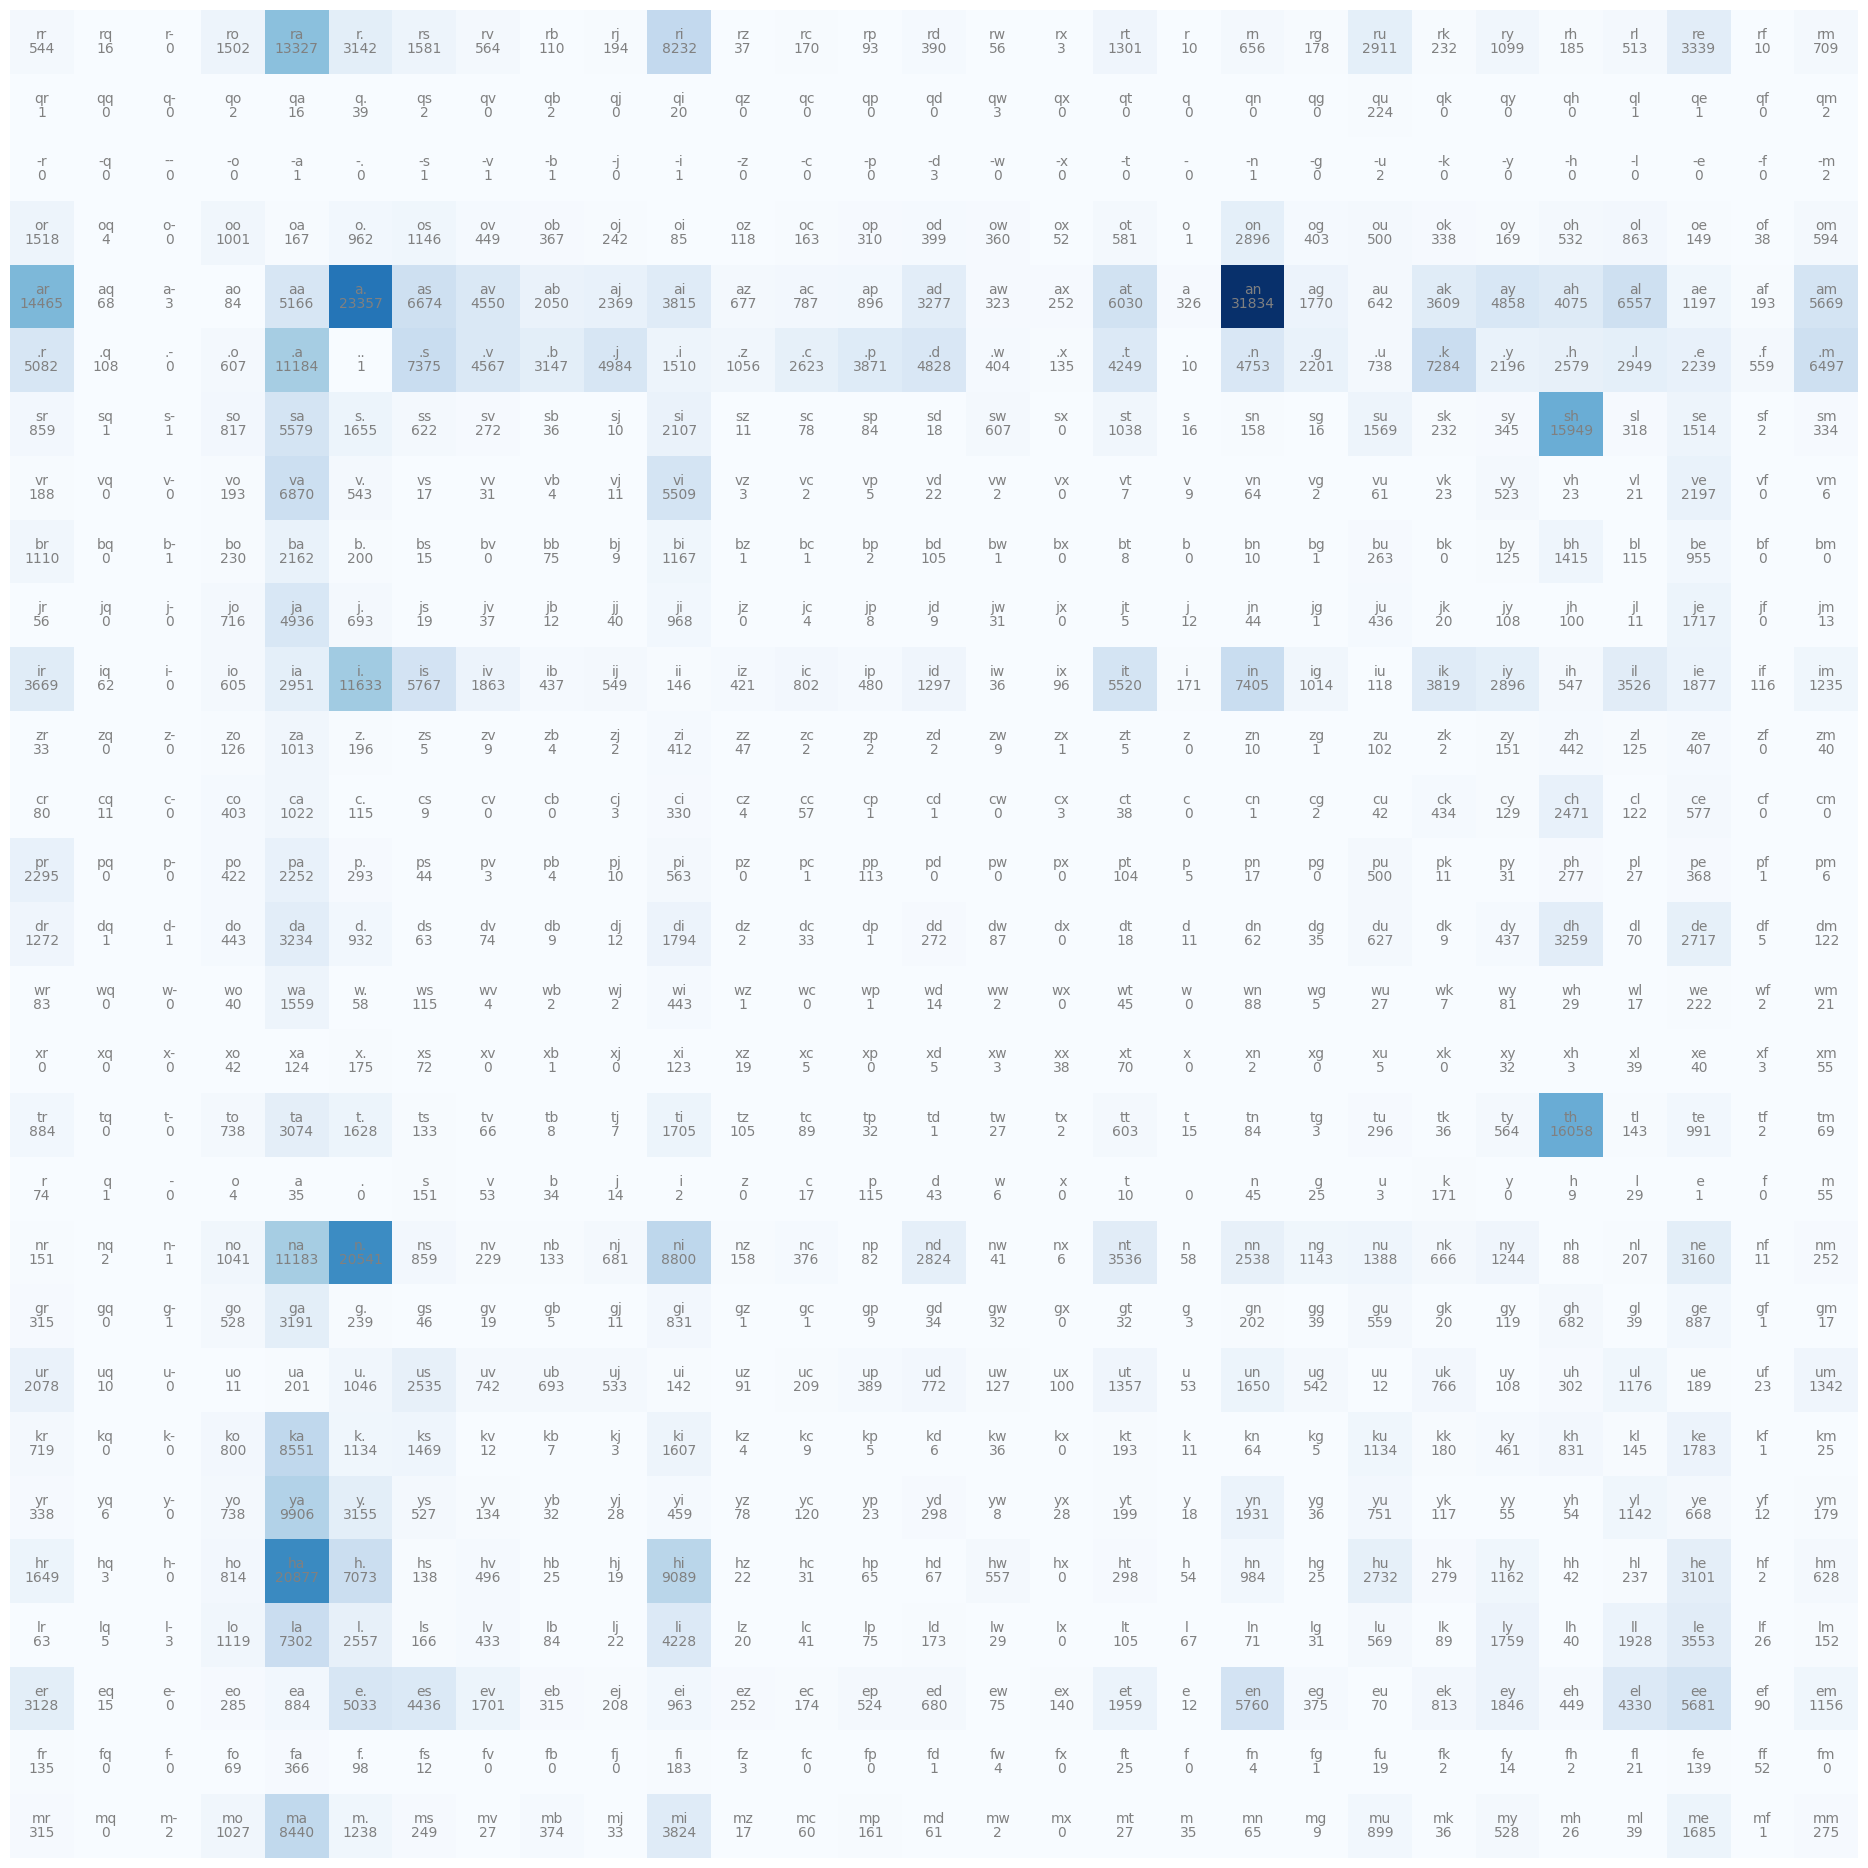

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(24,24))
plt.imshow(N, cmap='Blues')
for i in range(29):
    for j in range(29):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [24]:
N[0]

array([  544,    16,     0,  1502, 13327,  3142,  1581,   564,   110,
         194,  8232,    37,   170,    93,   390,    56,     3,  1301,
          10,   656,   178,  2911,   232,  1099,   185,   513,  3339,
          10,   709])

In [25]:
N[0].sum()

41104

In [26]:
prob = N[1]/N[1].sum()
prob.sum()

1.0

In [27]:
for i in range(29):
    prob = N[i]/N[i].sum()
    print(prob.sum())

1.0
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999998
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999998


In [28]:
M = N.copy()
M

array([[  544,    16,     0,  1502, 13327,  3142,  1581,   564,   110,
          194,  8232,    37,   170,    93,   390,    56,     3,  1301,
           10,   656,   178,  2911,   232,  1099,   185,   513,  3339,
           10,   709],
       [    1,     0,     0,     2,    16,    39,     2,     0,     2,
            0,    20,     0,     0,     0,     0,     3,     0,     0,
            0,     0,     0,   224,     0,     0,     0,     1,     1,
            0,     2],
       [    0,     0,     0,     0,     1,     0,     1,     1,     1,
            0,     1,     0,     0,     0,     3,     0,     0,     0,
            0,     1,     0,     2,     0,     0,     0,     0,     0,
            0,     2],
       [ 1518,     4,     0,  1001,   167,   962,  1146,   449,   367,
          242,    85,   118,   163,   310,   399,   360,    52,   581,
            1,  2896,   403,   500,   338,   169,   532,   863,   149,
           38,   594],
       [14465,    68,     3,    84,  5166, 23357,  6674,

In [29]:
sums = []

In [30]:
sums = M.sum(axis= 1)[:,np.newaxis]
sums.shape

(29, 1)

In [31]:
Prob = []
Prob = M.astype(float) / sums
Prob[2].sum()

1.0

In [32]:
Prob[1].sum()

1.0

In [33]:
# 29 29 M
#  1  29       sums
# rules of broadcasting 

In [34]:
prob = Prob[0]
prob

array([1.32347217e-02, 3.89256520e-04, 0.00000000e+00, 3.65414558e-02,
       3.24226353e-01, 7.64402491e-02, 3.84634099e-02, 1.37212923e-02,
       2.67613858e-03, 4.71973531e-03, 2.00272480e-01, 9.00155703e-04,
       4.13585053e-03, 2.26255352e-03, 9.48812768e-03, 1.36239782e-03,
       7.29855975e-05, 3.16514208e-02, 2.43285325e-04, 1.59595173e-02,
       4.33047879e-03, 7.08203581e-02, 5.64421954e-03, 2.67370572e-02,
       4.50077851e-03, 1.24805372e-02, 8.12329700e-02, 2.43285325e-04,
       1.72489295e-02])

In [35]:
# generation 
np.random.seed(36345)


for i in range(10):
    start = '.'
    word = []
    while True:
        ix1 = stoi[start]
        prob = Prob[ix1]
        new = np.random.choice(len(prob), size = 1, p = prob)[0]

#         print(itos[new])
        
        if new == stoi['.']:
            
            breako
        word.append(itos[new])    
        start = itos[new] 
    print(''.join(word))

shallagen
athisrarisah
ranni
anolipraitteshatthith
vaswan
rngeutht kree
an
adelat
sumprugiya
pikudaya


In [44]:
counts = 0
loss_sum = 0
loss = 1
for w in words[:2]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = Prob[ix1][ix2]
        loss *= prob
#         loss = 1/prob - 1 
#         loss_sum += loss
        counts += 1
        print(f'{ch1}{ch2}: {prob:.4f}, loss: {loss:.4f}')

        
# print(f'loss_sum = {loss_sum}')   
# print(loss_sum/counts)

.a: 0.1275, loss: 0.1275
aa: 0.0381, loss: 0.0049
ab: 0.0151, loss: 0.0001
ba: 0.2712, loss: 0.0000
an: 0.2348, loss: 0.0000
n.: 0.3345, loss: 0.0000
.a: 0.1275, loss: 0.0000
aa: 0.0381, loss: 0.0000
ab: 0.0151, loss: 0.0000
bh: 0.1775, loss: 0.0000
ha: 0.4137, loss: 0.0000
ar: 0.1067, loss: 0.0000
ra: 0.3242, loss: 0.0000
an: 0.2348, loss: 0.0000
n.: 0.3345, loss: 0.0000


In [ ]:
# log(a*b*c) = log(a) + log(b) + log(c)

In [56]:
counts = 0
loss = 0
for w in words[:2]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
#         prob = Prob[ix1][ix2]
        prob = 1/29
        log_loss = np.log(prob)
        loss += log_loss
        counts += 1
        print(f'{ch1}{ch2}: {prob:.4f}, loss: {log_loss:.4f}')

neg_log_likelihood =  -loss     
print(f'neg_log_likelihood : {-loss}')       
print(f'avg_neg_log_likelihood: {neg_log_likelihood/counts}')

.a: 0.0345, loss: -3.3673
aa: 0.0345, loss: -3.3673
ab: 0.0345, loss: -3.3673
ba: 0.0345, loss: -3.3673
an: 0.0345, loss: -3.3673
n.: 0.0345, loss: -3.3673
.a: 0.0345, loss: -3.3673
aa: 0.0345, loss: -3.3673
ab: 0.0345, loss: -3.3673
bh: 0.0345, loss: -3.3673
ha: 0.0345, loss: -3.3673
ar: 0.0345, loss: -3.3673
ra: 0.0345, loss: -3.3673
an: 0.0345, loss: -3.3673
n.: 0.0345, loss: -3.3673
neg_log_likelihood : 50.50943744979711
avg_neg_log_likelihood: 3.367295829986474
